In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
train_ds="/content/drive/MyDrive/datasetskincancer/data/train"
test_ds="/content/drive/MyDrive/datasetskincancer/data/test"


# Data preprocessing
****

In [5]:
os.listdir('/content/drive/MyDrive/datasetskincancer/data/train')

['benign', 'malignant']

In [6]:
batch_size=32
img_size=224

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


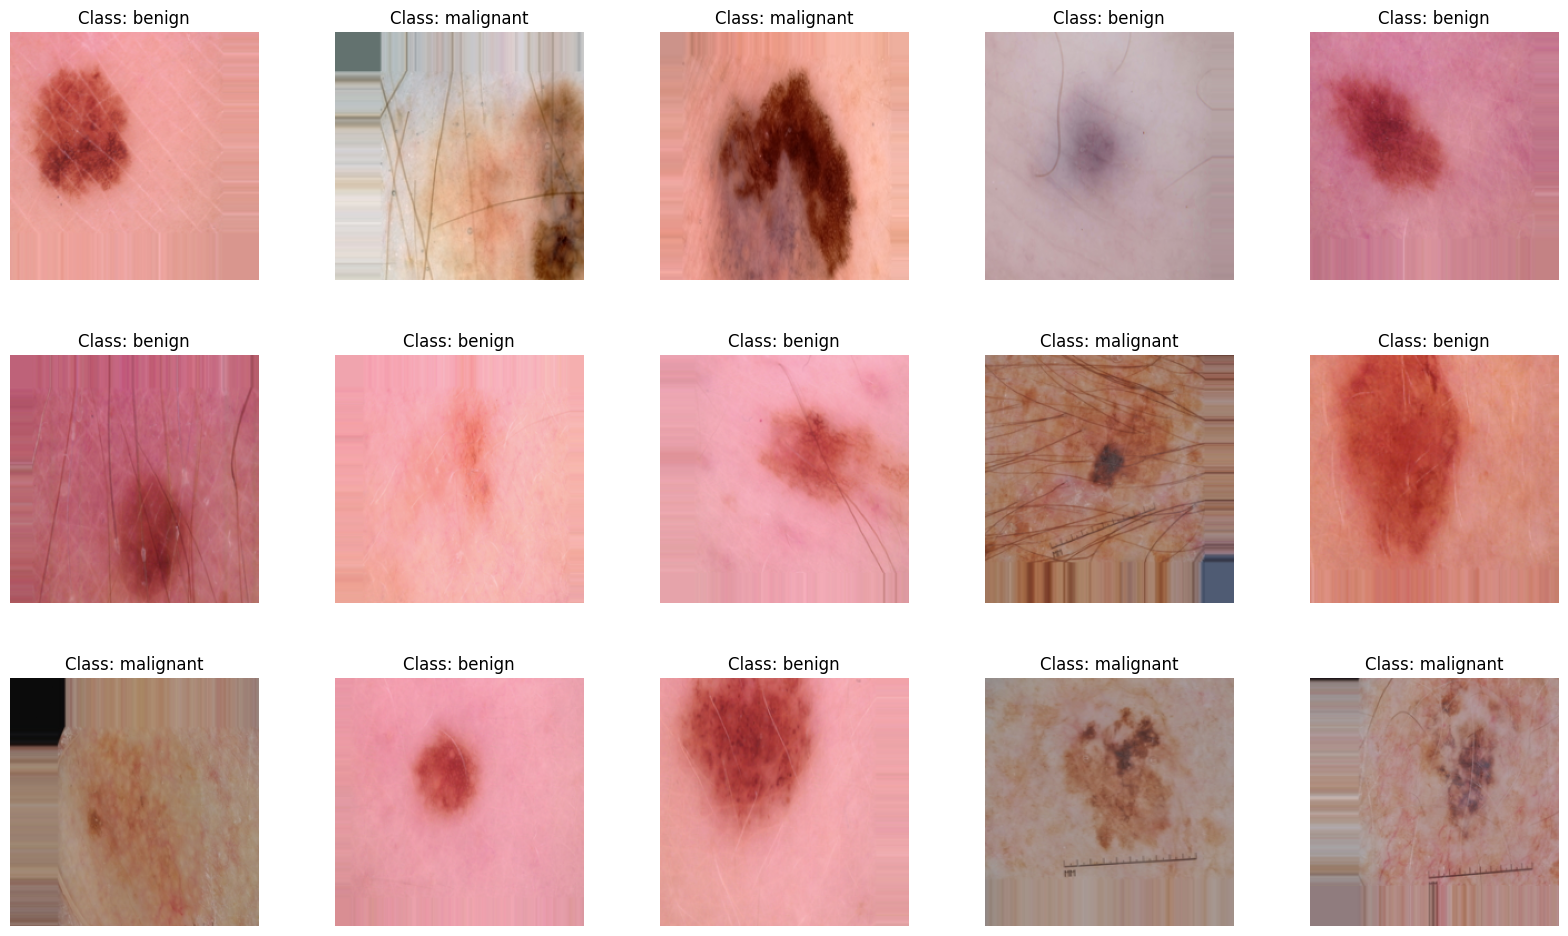

In [8]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [9]:
print(len(train_generator))
print(len(test_ds))


83
50


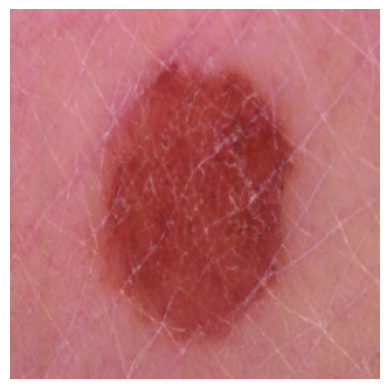

In [10]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/datasetskincancer/data/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
from keras.layers import MaxPool2D

In [12]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build VGG_19 Model

In [13]:
from keras.layers import MaxPool2D

In [14]:
from keras.layers import MaxPool2D

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.applications import Xception

# Define input image size (Xception requires at least 71x71 pixels)
img_size = 224  # Ensure img_size is at least 71
input_shape = (img_size, img_size, 3)

# Input layer
inputs = Input(shape=input_shape)

# Load the pre-trained Xception model without the top layers
base_model = Xception(weights='imagenet', include_top=False, input_tensor=inputs)

# Freeze the base model to prevent updating its weights during training
base_model.trainable = False

# Add layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce feature maps to a single vector
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(4096, activation="relu")(x)  # Add a fully connected layer
x = Dropout(0.5)(x)  # Add dropout for regularization
x = Dense(4096, activation="relu")(x)  # Add another fully connected layer
outputs = Dense(2, activation="softmax")(x)  # Output layer for binary classification

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#   Model summary

In [16]:
# Print the model summary


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 46,043,690 (175.64 MB)

 Trainable params: 25,182,210 (96.06 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [19]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 470s 5s/step - accuracy: 0.5540 - loss: 0.6797 - val_accuracy: 0.6530 - val_loss: 0.5856
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 49s 557ms/step - accuracy: 0.7234 - loss: 0.5597 - val_accuracy: 0.6788 - val_loss: 0.5557
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 83s 571ms/step - accuracy: 0.7449 - loss: 0.5310 - val_accuracy: 0.6697 - val_loss: 0.5688
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 48s 537ms/step - accuracy: 0.7546 - loss: 0.5240 - val_accuracy: 0.7379 - val_loss: 0.4890
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 83s 555ms/step - accuracy: 0.7606 - loss: 0.4975 - val_accuracy: 0.7485 - val_loss: 0.4969
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 557ms/step - accuracy: 0.7873 - loss: 0.4624 - val_accuracy: 0.7379 - val_loss: 0.5078
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 84s 580ms/step - accuracy: 0.7853 - loss: 0.4680 - val_accuracy: 0.7591 - val_loss: 0.4670
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 558ms/step - accuracy: 0.7837 - loss: 0.4629 - val_accuracy: 

In [20]:
n_categories = len(os.listdir('/content/drive/MyDrive/datasetskincancer/test'))# number of categories print(n_categories)

In [21]:
n_categories

2

In [22]:
results =pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.624194,0.642583,0.653030,0.585551
1,0.724308,0.555414,0.678788,0.555655
2,0.741752,0.532957,0.669697,0.568845
3,0.765264,0.511201,0.737879,0.489007
4,0.767539,0.487191,0.748485,0.496920


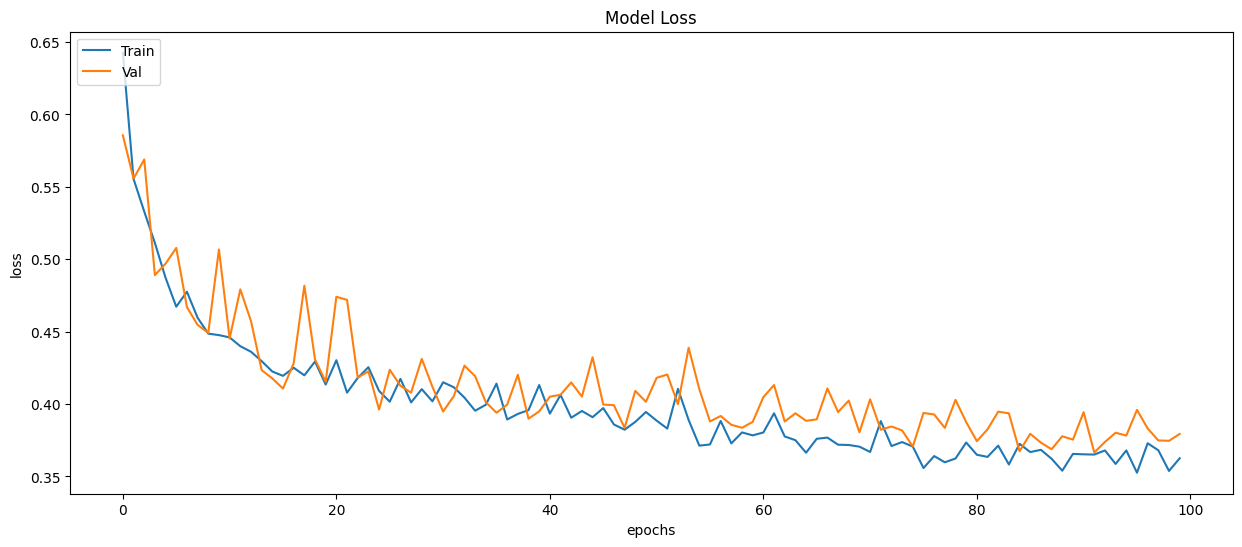

In [23]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

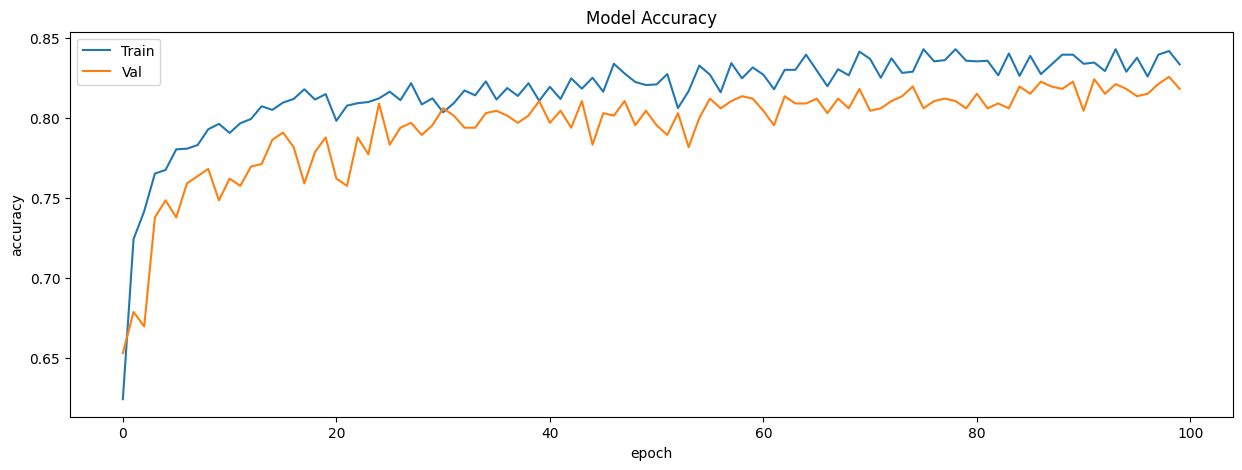

In [24]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [25]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step


In [26]:
results =model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.8459 - loss: 0.3072


In [27]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,precision_score, recall_score, roc_curve, f1_score

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       360
           1       0.84      0.74      0.79       300

    accuracy                           0.82       660
   macro avg       0.82      0.81      0.81       660
weighted avg       0.82      0.82      0.82       660



In [28]:
# Calculate metrics for each class
precision_0 = precision_score(y_test_1, y_pred_1, pos_label=0)
recall_0 = recall_score(y_test_1, y_pred_1, pos_label=0)
f1_0 = f1_score(y_test_1, y_pred_1, pos_label=0)
precision_1 = precision_score(y_test_1, y_pred_1, pos_label=1)
recall_1 = recall_score(y_test_1, y_pred_1, pos_label=1)
f1_1 = f1_score(y_test_1, y_pred_1, pos_label=1)

In [29]:
# Calculate additional metrics
auc = roc_auc_score(y_test_1, y_pred_1)
tn, fp, fn, tp = confusion_matrix(y_test_1, y_pred_1).ravel()
precision = precision_score(y_test_1, y_pred_1)
recall = recall_score(y_test_1, y_pred_1)
specificity = tn / (tn + fp)
fdr = fp / (fp + tp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)



# Print additional metrics for each class
print("Additional Metrics for Class 0:")
print(f"Precision: {precision_0:.2f}")
print(f"Recall: {recall_0:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_0:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

print("Additional Metrics for Class 1:")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

# Print average metrics
precision_avg = (precision_0 + precision_1) / 2
recall_avg = (recall_0 + recall_1) / 2
f1_avg = (f1_0 + f1_1) / 2

print("Average Metrics:")
print(f"Precision: {precision_avg:.2f}")
print(f"Recall: {recall_avg:.2f}")
print(f"F1 Score: {f1_avg:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}")




Additional Metrics for Class 0:
Precision: 0.80
Recall: 0.88
Specificity: 0.88
F1 Score: 0.84
FDR: 0.16
FNR: 0.26
FPR: 0.12

Additional Metrics for Class 1:
Precision: 0.84
Recall: 0.74
Specificity: 0.88
F1 Score: 0.79
FDR: 0.16
FNR: 0.26
FPR: 0.12

Average Metrics:
Precision: 0.82
Recall: 0.81
F1 Score: 0.81
AUC: 0.81
Specificity: 0.88
FDR: 0.16
FNR: 0.26
FPR: 0.12


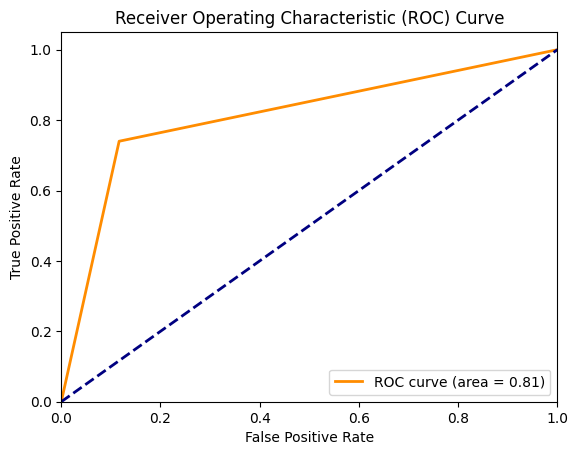

In [30]:
import matplotlib.pyplot as plt
# Calculate ROC curve
fpr_values, tpr_values, _ = roc_curve(y_test_1, y_pred_1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 743ms/step


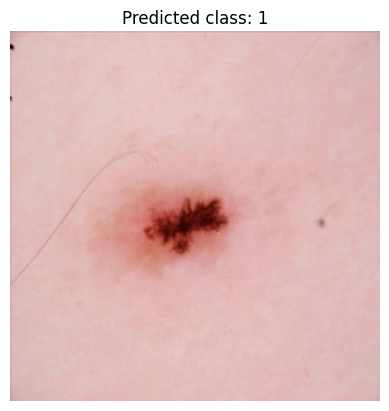

In [31]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/datasetskincancer/data/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [32]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : malignant
Class probability: 0.50148386
Predicted class for 2.jpg : benign
Class probability: 0.9669436
Predicted class for 3.jpg : benign
Class probability: 0.98414826
Predicted class for 4.jpg : benign
Class probability: 0.8203149
Predicted class for 5.jpg : benign
Class probability: 0.964908
Predicted class for 6.jpg : benign
Class probability: 0.9048112
Predicted class for 7.jpg : malignant
Class probability: 0.56686664
Predicted class for 8.jpg : benign
Class probability: 0.9758956
Predicted class for 9.jpg : malignant
Class probability: 0.83391744
Predicted class for 10.jpg : benign
Class probability: 0.9841313
Predicted class for 11.jpg : malignant
Class probability: 0.5205584
Predicted class for 12.jpg : benign
Class probability: 0.9847477
Predicted class for 13.jpg : benign
Class probability: 0.9446939
Predicted class for 14.jpg : benign
Class probability: 0.7808267
Predicted class for 15.jpg : benign
Class probability: 0.93225175
Predicted class fo